In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 200)

def toFloat(df,cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col],errors='coerce')

def toInt(df,cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col],errors='coerce')
        df[col] = df[col].fillna(0).astype(np.int64)

## Reportcard.csv

In [5]:
df = pd.read_csv("Most-Recent-Cohorts-Institution.csv")
df.shape

(6662, 2993)

In [7]:
df["%Tech"] = (df['PCIP11'] + df['PCIP14'] + df['PCIP15'] + df['PCIP27'] + df['PCIP40'] + df['PCIP41'])
df["%Business"] = df['PCIP52']
df["%Biology"] = df['PCIP26']
df["%STEM"] = df["%Tech"] + df["%Business"] + df["%Biology"]

df.dropna(axis=0, thresh=1500, inplace=True) # drop rows (axis=0) if less than 1500 attributes have values (non-null/NaN)
df.shape

(6261, 2915)

In [33]:
df.shape
df.replace('PrivacySuppressed', np.NaN, inplace=True)
df.dropna(axis=1, thresh=500, inplace=True) # drop columns (axis=1) if less than 500 entries have values (non-null/NaN)
df.shape

(3027, 2401)

In [40]:
df = df[(df['CCBASIC'] > 0) & (df['CCSIZSET'] > 2)] # Carnegie Classification for 2 & 4 year college only
print(df.shape)

(3027, 2401)


In [10]:
toInt(df,['UGDS','FAMINC','MD_FAMINC','MD_EARN_WNE_P10','PCT25_EARN_WNE_P6','PCT25_EARN_WNE_P10','RPY_3YR_RT_SUPP',
    'PELL_RPY_3YR_RT_SUPP','MN_EARN_WNE_P10', 'PCT90_EARN_WNE_P6','PCT90_EARN_WNE_P10'])

In [18]:
toFloat(df,['FAMINC','MD_FAMINC','MD_EARN_WNE_P10','PCT25_EARN_WNE_P6','PCT25_EARN_WNE_P10','RPY_3YR_RT_SUPP','PELL_RPY_3YR_RT_SUPP',
            'PCT_BLACK','PCT_WHITE','PCT_HISPANIC','PCT_ASIAN','MN_EARN_WNE_P10','PCT90_EARN_WNE_P6','PCT90_EARN_WNE_P10'])

In [53]:
df[(df['PREDDEG'] == 3) & (df['CONTROL'] == 3)].to_csv("forprofit_4yr_colleges.csv") # for profit 4-yr colleges
df[(df['PREDDEG'] == 3) & (df['CONTROL'] != 3) & (df['UGDS'] < 500)].to_csv("small_4yr_colleges.csv") # small non-profit 4-yr

df[(df['PREDDEG'] == 3) & (df['CONTROL'] != 3) & (df['UGDS'] >= 500)].to_csv("reportcard.csv") # Predominantly bachelor's-degree granting
df[df['PREDDEG'] == 2].to_csv("reportcard_cc.csv") # Predominantly associate's-degree granting

In [55]:
df.shape

(3027, 2401)

In [57]:
df[(df['PREDDEG'] == 3) & (df['CONTROL'] != 3) & (df['UGDS'] >= 500)].to_csv("reportcard.csv")

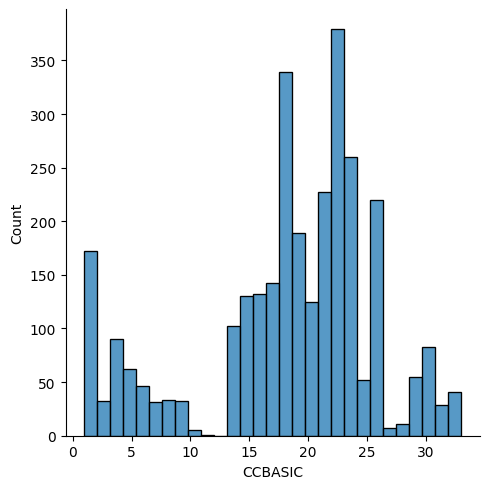

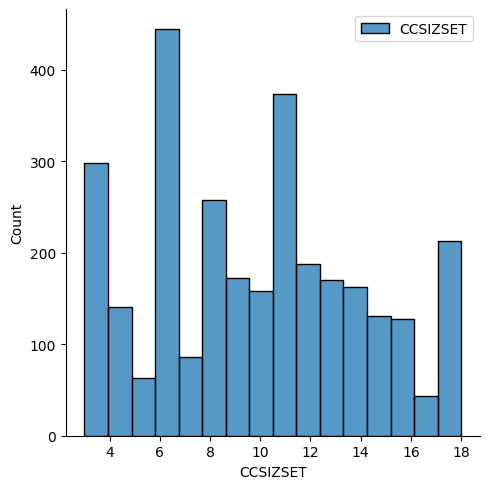

In [42]:
import seaborn as sns

d1 = df[['CCBASIC','CCSIZSET']]
for i, column in enumerate(d1.columns[:]):
    sns.displot(d1[column], label=column)

# Add a legend and show the plot
plt.legend()
plt.show()

## More Processing

no admission rate, or the rate is obviously wrong < 2%
```
c = df['ADM_RATE'].isnull() | df['ADM_RATE'].le(0.02, fill_value=1.0) 
df = df[~c] # exclude colleges that doon't provide admin rate
```
fields with their "Null count"
```
df.isnull().sum().to_csv("null_fields.csv")
```

In [ ]:
# regionMap = {0:"U.S. Service Schools",1:"New Englend",2:"Mid East",3:"Great Lakes",4:"Plains",5:"Southeast",6:"Southwest",7:"Rocky Mountains",8:"Far West",9:"Outlying"}
# df['REGION'] = df['REGION'].map(regionMap)

In [ ]:
selected = ['OPEID6','INSTNM','UGDS','INSTURL','LATITUDE','LONGITUDE','CITY','STABBR','ZIP','PREDDEG','REGION','ADM_RATE','MN_EARN_WNE_P10','MD_EARN_WNE_P10',
            'PCT90_EARN_WNE_P6','PCT90_EARN_WNE_P10','PCT25_EARN_WNE_P6','PCT25_EARN_WNE_P10',
            'NPT45_PRIV','NPT45_PUB','NPT43_PRIV','NPT43_PUB','NPT41_PRIV','NPT41_PUB','NPT4_PUB','NPT4_PRIV',
            'FAMINC','MD_FAMINC','RPY_3YR_RT_SUPP','PELL_RPY_3YR_RT_SUPP','CDR3',
            'PCIP11','PCIP15','PCIP27','PCIP40','PCT_WHITE','PCT_BLACK','PCT_HISPANIC','PCT_ASIAN',
            'UGDS_WHITE','UGDS_ASIAN','UGDS_BLACK','UGDS_HISP','C150_4_BLACK','C150_4_HISP','C150_4_ASIAN','C150_4_WHITE',
            'Tech Degrees','Business Degree','Biology Degree','STEM Degrees']

In [ ]:
display = {'INSTNM':'College','UGDS':'Undergraduate Enrollment','PREDDEG':'Predominant degree','ADM_RATE':'Admission rate',
           'MN_EARN_WNE_P10':'Mean Earnings 10Yr','MD_EARN_WNE_P10':'Median Earnings 10Yr',
            'PCT90_EARN_WNE_P6':'90% earnings 6Yr','PCT90_EARN_WNE_P10':'90% earnings 10Yr','PCT25_EARN_WNE_P6':'25% earnings 6Yr',
            'PCT25_EARN_WNE_P10':'25% earnings 10Yr','NPT45_PRIV':'Net Price 110k family (Private)','NPT45_PUB':'Net Price 110k family (Public)',
            'NPT43_PRIV':'Net Price 48-75k family (Private)','NPT43_PUB':'Net Price 48-75k family (Public)',
            'NPT41_PRIV':'Net Price 0-30k family (Private)','NPT41_PUB':'Net Price 0-30k family (Public)',
            'NPT4_PUB':'Net Price All Income (Public)','NPT4_PRIV':'Net Price All Income (Private)',
            'FAMINC':'Avg Family Income','MD_FAMINC':'Median Family Income','RPY_3YR_RT_SUPP':'3Yr Repayment Rate',
            'PELL_RPY_3YR_RT_SUPP':'3Yr Repayment Rate (Pell Students)','CDR3':'3Yr Default Rate',
            'PCIP11':'% CS/IT','PCIP14':'% Engineering','PCIP15':'% Engineering Related','PCIP27':'% Math/Stats','PCIP40':'% Physical Science',
            'PCT_WHITE':'% students neighbors Whites','PCT_BLACK':'% students neighbors Blacks','PCT_HISPANIC':'% students neighbors Hispanic',
            'PCT_ASIAN':'% students neighbors Asians','UGDS_WHITE':'% undergrades Whites','UGDS_ASIAN':'% undergrades Asians',
            'UGDS_BLACK':'% undergrades Blacks','UGDS_HISP':'% undergrades Hispanic','C150_4_BLACK':'6Yr Completion % Blacks',
            'C150_4_HISP':'6Yr Completion % Hispanics','C150_4_ASIAN':'6Yr Completion % Asians','C150_4_WHITE':'6Yr Completion % Whites'}

In [ ]:
s1 = df[selected].isnull().sum()
s2 = df[selected].dtypes
s3 = s2.index.to_series().map(code2name)
s1.name = "nullcount"
s2.name = "dtypes"
s3.name = "desc"
info = pd.concat([s1, s2, s3], axis=1)
info
#info.to_csv("lookup.csv")

In [ ]:
out = df[selected].copy()
out.set_index('OPEID6', inplace=True)
out.rename(columns=display, inplace=True)

In [ ]:
out['Net Price (All Income)'] = out['Net Price All Income (Public)'].fillna(0) + out['Net Price All Income (Private)'].fillna(0)
out['Net Price 0-30k'] = out['Net Price 0-30k family (Public)'].fillna(0) + out['Net Price 0-30k family (Private)'].fillna(0)
out['Net Price 110K+'] = out['Net Price 110k family (Public)'].fillna(0) + out['Net Price 110k family (Private)'].fillna(0)

In [ ]:
df.dropna(df['LONGITUDE'].isnull() | df['LATITUDE'].isnull()]

In [ ]:
mrc_display = {'tier_name':'Tier Name', 'female':'% Female','k_married':'% Married','mr_kq5_pq1':'Mobility rate (80%->20%)',
               'mr_ktop1_pq1':'Upper-tail mobility rate (80%->1%)','par_mean':'Mean parental income','par_median':'Median parent household income',
               'par_rank':'Mean parental income rank','k_rank':'Mean kid earnings rank','k_mean':'Mean kid earnings',
               'k_median':'Median child individual earnings'}

In [ ]:
mrc = pd.read_csv("mrc_table2.csv")
mrc.rename(columns={'super_opeid':'OPEID6'}, inplace=True)
mrc.set_index('OPEID6', inplace=True)
mrc.rename(columns=mrc_display, inplace=True)

In [ ]:
out.join(mrc, how='inner').to_csv("reportcard.csv")